# CNN - Binary Classification

Cat or Non-cat image classification using CNN model

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Data Set

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [15]:
# shape of the data

print("Shape of X_train before reshape:", X_train.shape)
print("Shape of Y_train before reshape:", Y_train.shape)
print("Shape of X_test before reshape:", X_test.shape)
print("Shape of Y_test before reshape:", Y_test.shape)

Shape of X_train before reshape: (2000, 30000)
Shape of Y_train before reshape: (2000,)
Shape of X_test before reshape: (400, 30000)
Shape of Y_test before reshape: (400,)


In [16]:
#Lets rehspe the data having RGB

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100,100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


In [17]:
#check the shape of the data after reshape

print("Shape of X_train after reshape:", X_train.shape)
print("Shape of Y_train after reshape:", Y_train.shape)
print("Shape of X_test after reshape:", X_test.shape)
print("Shape of Y_test after reshape:", Y_test.shape)

Shape of X_train after reshape: (2000, 100, 100, 3)
Shape of Y_train after reshape: (2000, 1)
Shape of X_test after reshape: (400, 100, 100, 3)
Shape of Y_test after reshape: (400, 1)


In [18]:
X_train[0, :]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [19]:
#lets normalize the images

X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
X_train[0, :]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

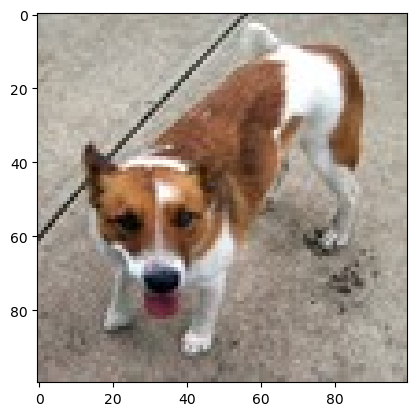

In [21]:
##Lets chewck the images

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

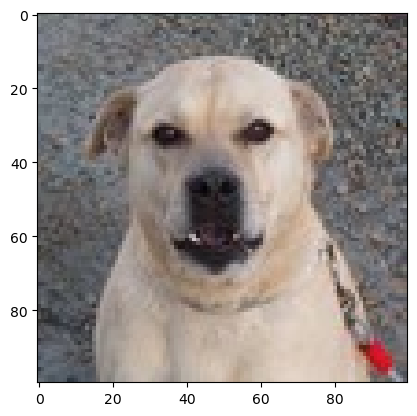

it is dog


In [26]:
##Lets chewck the images

idx3 = 5
plt.imshow(X_train[idx3, :])
plt.show()


label = Y_train[idx3, :]

if label == 0:
    print("it is dog")
else:
    print("Its cat")

# Model

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [37]:
# Lets compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
# fit ther model to data

model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 11s 302ms/step - loss: 0.4981 - accuracy: 0.7540
Epoch 2/10
32/32 [==============================] - 10s 313ms/step - loss: 0.4296 - accuracy: 0.8025
Epoch 3/10
32/32 [==============================] - 10s 325ms/step - loss: 0.4035 - accuracy: 0.8155
Epoch 4/10
32/32 [==============================] - 11s 329ms/step - loss: 0.3072 - accuracy: 0.8715
Epoch 5/10
32/32 [==============================] - 10s 324ms/step - loss: 0.2346 - accuracy: 0.9095
Epoch 6/10
32/32 [==============================] - 11s 328ms/step - loss: 0.1788 - accuracy: 0.9320
Epoch 7/10
32/32 [==============================] - 11s 335ms/step - loss: 0.1486 - accuracy: 0.9485
Epoch 8/10
32/32 [==============================] - 10s 325ms/step - loss: 0.0824 - accuracy: 0.9810
Epoch 9/10
32/32 [==============================] - 10s 318ms/step - loss: 0.0603 - accuracy: 0.9870
Epoch 10/10
32/32 [==============================] - 10s 312ms/step - loss: 0.0382 - accura

In [39]:
##Evaluavte the model

model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 32ms/step - loss: 1.0745 - accuracy: 0.6800


[1.0744833946228027, 0.6800000071525574]

In [ ]:
## Model having high variance

## we can reduce this by adding more data

# Make Predictiona

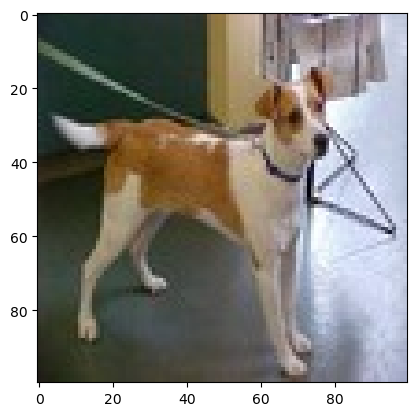

1/1 [==============================] - 0s 26ms/step
Model predictin it as : dog


In [41]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred>0.5
if y_pred ==0:
    pred = 'dog'
else:
    pred = "cat"

print("Model predictin it as :", pred)